# NTU 111-2 Data Analytics Term Project
In the coming week, at what time will users watch KKTV?

In this challenge, you must predict in which timeslot the users will watch KKTV programs within a week. A day is divided into four timeslots: 1h00, 9h00, 17h00, and 21h00. Therefore, there will be a total of 28 (4X7) timeslots to be predicted.

Data are provided in two versions: complete and light. The complete version is nearly the raw data from the KKTV product line, while the light version has been pre-processed into a simplified format, i.e., if a user has activities in the timeslots.

https://www.kaggle.com/competitions/data-analytics-datagame/data?select=train_target_events.csv

In [7]:
import pandas as pd
import zipfile

# Unzip the files
with zipfile.ZipFile('light_test_source_labels.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()

with zipfile.ZipFile('light_train_source_labels.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()

with zipfile.ZipFile('light_train_target_labels.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Read the files into pandas DataFrames
test_source_df = pd.read_csv('light_test_source_labels.csv') # Data we apply our model to -> results
train_source_df = pd.read_csv('light_train_source_labels.csv') # train data
train_target_df = pd.read_csv('light_train_target_labels.csv') # train labels

In [2]:
train_source_df

,user_id,time_slot_0,time_slot_1,time_slot_2,time_slot_3,time_slot_4,time_slot_5,time_slot_6,time_slot_7,time_slot_8,...,time_slot_1026,time_slot_1027,time_slot_1028,time_slot_1029,time_slot_1030,time_slot_1031,time_slot_1032,time_slot_1033,time_slot_1034,time_slot_1035
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30455,30455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30456,30456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30457,30457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
30458,30458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
train_target_df

,user_id,time_slot_0,time_slot_1,time_slot_2,time_slot_3,time_slot_4,time_slot_5,time_slot_6,time_slot_7,time_slot_8,...,time_slot_18,time_slot_19,time_slot_20,time_slot_21,time_slot_22,time_slot_23,time_slot_24,time_slot_25,time_slot_26,time_slot_27
0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30455,30455,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30456,30456,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30457,30457,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
30458,30458,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
len(train_target_df)

30460

In [4]:
#input shape: 30460, 1038
print(train_source_df.shape)
# output shape: 
print(train_target_df.shape)

(30460, 1037)
(30460, 29)


In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_val, y_train, y_val = train_test_split(train_source_df.drop('user_id', axis=1), train_target_df.drop('user_id', axis=1), test_size=0.2, random_state=42)


In [14]:
def create_model(input_dim, output_dim):
    model = Sequential()
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(output_dim, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

input_dim = X_train.shape[1]
output_dim = y_train.shape[1]
model = create_model(input_dim, output_dim)

In [15]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=64, verbose=1)

Epoch 1/50
381/381 [==============================] - 3s 7ms/step - loss: 0.3414 - accuracy: 0.1061 - val_loss: 0.3198 - val_accuracy: 0.1645
Epoch 2/50
381/381 [==============================] - 2s 6ms/step - loss: 0.3104 - accuracy: 0.1303 - val_loss: 0.3157 - val_accuracy: 0.1379
Epoch 3/50
381/381 [==============================] - 2s 6ms/step - loss: 0.2979 - accuracy: 0.1455 - val_loss: 0.3189 - val_accuracy: 0.1538
Epoch 4/50
381/381 [==============================] - 2s 6ms/step - loss: 0.2872 - accuracy: 0.1607 - val_loss: 0.3216 - val_accuracy: 0.1216
Epoch 5/50
381/381 [==============================] - 2s 6ms/step - loss: 0.2747 - accuracy: 0.1773 - val_loss: 0.3267 - val_accuracy: 0.1581
Epoch 6/50
381/381 [==============================] - 2s 6ms/step - loss: 0.2643 - accuracy: 0.2004 - val_loss: 0.3318 - val_accuracy: 0.1389
Epoch 7/50
381/381 [==============================] - 2s 6ms/step - loss: 0.2531 - accuracy: 0.2214 - val_loss: 0.3414 - val_accuracy: 0.1333
Epoch 

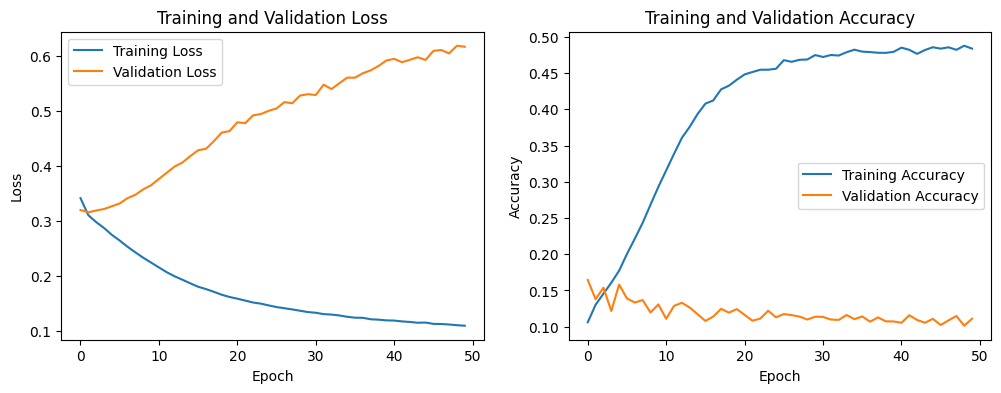

In [16]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.show()

plot_training_history(history)


In [48]:
model.evaluate(X_val, y_val)
predictions = model.predict(X_val)


191/191 [==============================] - 0s 2ms/step


In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Prepare your data
#X = in_data.drop('user_id', axis=1)
#y = out_data.drop('user_id', axis=1)

# Split your data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize your data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Create the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)


C:\Users\Aleni\miniconda3\envs\gpu_notebook\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Epoch 1/100
610/610 [==============================] - 4s 5ms/step - loss: 0.3580 - accuracy: 0.1075 - val_loss: 0.3211 - val_accuracy: 0.1186
Epoch 2/100
610/610 [==============================] - 3s 5ms/step - loss: 0.3091 - accuracy: 0.1514 - val_loss: 0.3170 - val_accuracy: 0.1342
Epoch 3/100
610/610 [==============================] - 3s 5ms/step - loss: 0.2967 - accuracy: 0.1669 - val_loss: 0.3183 - val_accuracy: 0.1190
Epoch 4/100
610/610 [==============================] - 3s 5ms/step - loss: 0.2882 - accuracy: 0.1826 - val_loss: 0.3223 - val_accuracy: 0.1282
Epoch 5/100
610/610 [==============================] - 3s 5ms/step - loss: 0.2810 - accuracy: 0.1856 - val_loss: 0.3253 - val_accuracy: 0.1258
Epoch 6/100
610/610 [==============================] - 3s 5ms/step - loss: 0.2742 - accuracy: 0.1914 - val_loss: 0.3330 - val_accuracy: 0.1137
Epoch 7/100
610/610 [==============================] - 3s 5ms/step - loss: 0.2683 - accuracy: 0.1958 - val_loss: 0.3368 - val_accuracy: 0.1172

Epoch 58/100
610/610 [==============================] - 3s 5ms/step - loss: 0.1823 - accuracy: 0.3141 - val_loss: 0.6046 - val_accuracy: 0.0995
Epoch 59/100
610/610 [==============================] - 3s 5ms/step - loss: 0.1817 - accuracy: 0.3122 - val_loss: 0.6063 - val_accuracy: 0.1092
Epoch 60/100
610/610 [==============================] - 3s 5ms/step - loss: 0.1811 - accuracy: 0.3177 - val_loss: 0.6082 - val_accuracy: 0.1034
Epoch 61/100
610/610 [==============================] - 3s 5ms/step - loss: 0.1809 - accuracy: 0.3135 - val_loss: 0.6119 - val_accuracy: 0.1061
Epoch 62/100
610/610 [==============================] - 3s 5ms/step - loss: 0.1803 - accuracy: 0.3147 - val_loss: 0.6168 - val_accuracy: 0.1122
Epoch 63/100
610/610 [==============================] - 3s 5ms/step - loss: 0.1802 - accuracy: 0.3212 - val_loss: 0.6205 - val_accuracy: 0.1079
Epoch 64/100
610/610 [==============================] - 3s 5ms/step - loss: 0.1795 - accuracy: 0.3191 - val_loss: 0.6252 - val_accuracy:

NameError: name 'X_test' is not defined

Epoch 1/100
381/381 [==============================] - 8s 16ms/step - loss: 0.4095 - accuracy: 0.0908 - val_loss: 0.3291 - val_accuracy: 0.1077
Epoch 2/100
381/381 [==============================] - 5s 14ms/step - loss: 0.3281 - accuracy: 0.1205 - val_loss: 0.3193 - val_accuracy: 0.1067
Epoch 3/100
381/381 [==============================] - 5s 14ms/step - loss: 0.3196 - accuracy: 0.1343 - val_loss: 0.3159 - val_accuracy: 0.1440
Epoch 4/100
381/381 [==============================] - 6s 15ms/step - loss: 0.3142 - accuracy: 0.1350 - val_loss: 0.3154 - val_accuracy: 0.1497
Epoch 5/100
381/381 [==============================] - 6s 15ms/step - loss: 0.3104 - accuracy: 0.1429 - val_loss: 0.3153 - val_accuracy: 0.1362
Epoch 6/100
381/381 [==============================] - 5s 14ms/step - loss: 0.3065 - accuracy: 0.1426 - val_loss: 0.3144 - val_accuracy: 0.1530
Epoch 7/100
381/381 [==============================] - 5s 14ms/step - loss: 0.3034 - accuracy: 0.1467 - val_loss: 0.3149 - val_accuracy:

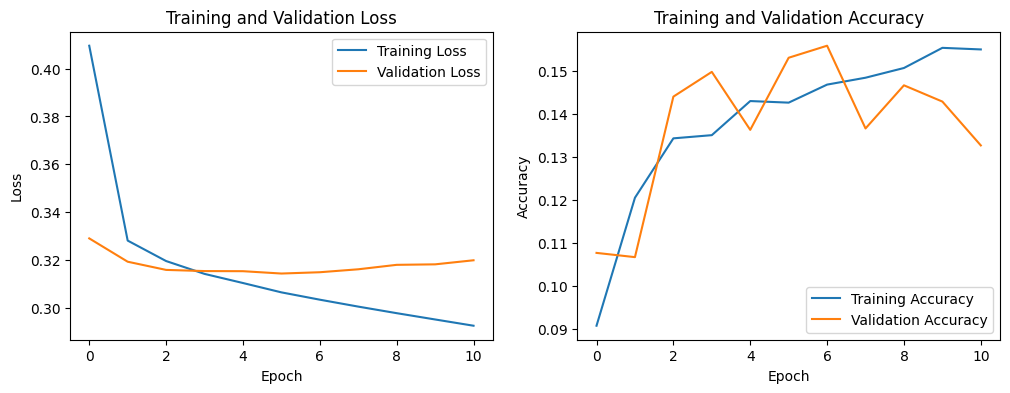

In [56]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Reshape the input data to be suitable for LSTM (samples, timesteps, features)
X_train_reshaped = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_val_reshaped = np.reshape(X_val.values, (X_val.shape[0], 1, X_val.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(1, X_train.shape[1]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1], activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_reshaped, y_train, validation_data=(X_val_reshaped, y_val), epochs=100, batch_size=64, callbacks=[early_stopping])

# Evaluate the model
y_val_pred = (model.predict(X_val_reshaped) > 0.5).astype("int32")

print("F1-score: ", f1_score(y_val, y_val_pred, average='weighted'))
print("Precision: ", precision_score(y_val, y_val_pred, average='weighted'))
print("Recall: ", recall_score(y_val, y_val_pred, average='weighted'))

# Plot the training history
plot_training_history(history)


Epoch 1/100
381/381 [==============================] - 16s 36ms/step - loss: 0.3846 - accuracy: 0.0892 - val_loss: 0.3290 - val_accuracy: 0.1274
Epoch 2/100
381/381 [==============================] - 13s 35ms/step - loss: 0.3325 - accuracy: 0.1034 - val_loss: 0.3222 - val_accuracy: 0.1279
Epoch 3/100
381/381 [==============================] - 14s 37ms/step - loss: 0.3248 - accuracy: 0.1149 - val_loss: 0.3190 - val_accuracy: 0.1310
Epoch 4/100
381/381 [==============================] - 15s 39ms/step - loss: 0.3199 - accuracy: 0.1333 - val_loss: 0.3160 - val_accuracy: 0.1120
Epoch 5/100
381/381 [==============================] - 14s 38ms/step - loss: 0.3167 - accuracy: 0.1363 - val_loss: 0.3150 - val_accuracy: 0.1620
Epoch 6/100
381/381 [==============================] - 14s 37ms/step - loss: 0.3137 - accuracy: 0.1380 - val_loss: 0.3177 - val_accuracy: 0.1392
Epoch 7/100
381/381 [==============================] - 14s 37ms/step - loss: 0.3108 - accuracy: 0.1449 - val_loss: 0.3155 - val_ac

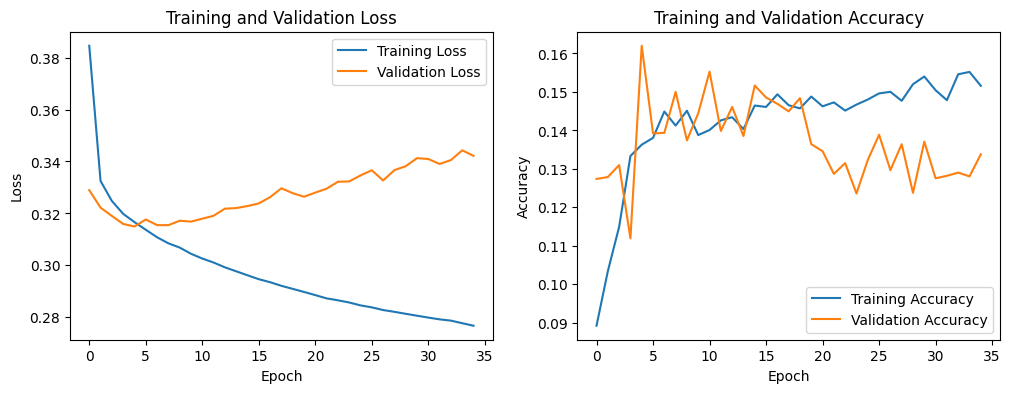

In [58]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import f1_score, precision_score, recall_score

# Preprocess data to have shape (samples, 4, features/4)
n_timeslots = 4
X_train_reshaped = np.reshape(X_train.values, (X_train.shape[0], n_timeslots, X_train.shape[1] // n_timeslots))
X_val_reshaped = np.reshape(X_val.values, (X_val.shape[0], n_timeslots, X_val.shape[1] // n_timeslots))

# Define the GRU model
model = Sequential()
model.add(GRU(64, activation='relu', input_shape=(n_timeslots, X_train.shape[1] // n_timeslots), return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1], activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# Train the model
history = model.fit(X_train_reshaped, y_train, validation_data=(X_val_reshaped, y_val), epochs=100, batch_size=64, callbacks=[early_stopping])

# Evaluate the model
y_val_pred = (model.predict(X_val_reshaped) > 0.5).astype("int32")

print("F1-score: ", f1_score(y_val, y_val_pred, average='weighted'))
print("Precision: ", precision_score(y_val, y_val_pred, average='weighted'))
print("Recall: ", recall_score(y_val, y_val_pred, average='weighted'))

# Plot the training history
plot_training_history(history)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier

# Create and train the MultiOutput Logistic Regression model
model = MultiOutputClassifier(LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)

In [ ]:
# Evaluate the model
score = model.score(X_test, y_test)
print("Model score:", score)

# MultiOutputClassifier KNN

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import roc_auc_score

# Load the data
train_source = pd.read_csv('light_train_source_labels.csv')
train_target = pd.read_csv('light_train_target_labels.csv')
test_source = pd.read_csv('light_test_source_labels.csv')

# Preprocess the data
X_train = train_source.drop('user_id', axis=1)
y_train = train_target.drop('user_id', axis=1)
X_test = test_source.drop('user_id', axis=1)

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the KNN classifier with MultiOutputClassifier
knn = KNeighborsClassifier(n_neighbors=5)
multioutput_knn = MultiOutputClassifier(knn)
multioutput_knn.fit(X_train, y_train)

# Make predictions
y_pred_val = multioutput_knn.predict_proba(X_val)
y_pred_test = multioutput_knn.predict_proba(X_test)

# Extract the probabilities for the positive class (1) and calculate the mean AUC score
auc_scores = []
for i in range(y_val.shape[1]):
    auc = roc_auc_score(y_val.iloc[:, i], y_pred_val[i][:, 1])
    auc_scores.append(auc)
mean_auc_val = np.mean(auc_scores)
print(f'Mean Validation AUC: {mean_auc_val}')

Mean Validation AUC: 0.5885189188995049


In [15]:
# Save predictions for test set
predictions = []
for i in range(len(y_pred_test)):
    predictions.append(y_pred_test[i][:, 1])
y_pred_test_df = pd.DataFrame(np.array(predictions).T, columns=y_train.columns)
submission = pd.concat([test_source['user_id'], y_pred_test_df], axis=1)
submission.to_csv('submission.csv', index=False)

# 2nd try

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Load the data
train_source = pd.read_csv('light_train_source_labels.csv')
train_target = pd.read_csv('light_train_target_labels.csv')
test_source = pd.read_csv('light_test_source_labels.csv')

# Preprocess the data
X_train = train_source.drop('user_id', axis=1)
y_train = train_target.drop('user_id', axis=1)
X_test = test_source.drop('user_id', axis=1)

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler and KNN
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Define the hyperparameters to be tuned
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
multioutput_grid_search = MultiOutputClassifier(grid_search)
multioutput_grid_search.fit(X_train, y_train)

# Get the best combination of hyperparameters
best_params = grid_search.best_params_
print(f'Best hyperparameters: {best_params}')

# Make predictions using the best combination of hyperparameters
y_pred_val = multioutput_grid_search.predict_proba(X_val)
y_pred_test = multioutput_grid_search.predict_proba(X_test)

# Extract the probabilities for the positive class (1) and calculate the mean AUC score
auc_scores = []
for i in range(y_val.shape[1]):
    auc = roc_auc_score(y_val.iloc[:, i], y_pred_val[i][:, 1])
    auc_scores.append(auc)
mean_auc_val = np.mean(auc_scores)
print(f'Mean Validation AUC: {mean_auc_val}')

# Save predictions for test set
predictions = []
for i in range(len(y_pred_test)):
    predictions.append(y_pred_test[i][:, 1])
y_pred_test_df = pd.DataFrame(np.array(predictions).T, columns=y_train.columns)
submission = pd.concat([test_source['user_id'], y_pred_test_df], axis=1)
submission.to_csv('submission.csv', index=False)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
